In [31]:
import pandas as pd
import numpy as np

In [32]:
apex= pd.read_csv('/Users/vatsalyadaita/Documents/Fall 2024/CSE 482/Project/CSE482_PROJ/processed_data/apex_ad2600_dvd_player_updated.csv').drop(columns=['Unnamed: 0'])
apex.head()

,title,sentence,sentiment_dict,sentiment_total,[u],[p],[s],[cc],[cs],annotations,title_input_ids,title_attention_mask,sentence_input_ids,sentence_attention_mask
0,troubleshoot ad-2500 and ad-2600 no picture sc...,repost from january 13 2004 with a better fit ...,{},0,False,False,False,False,False,NaN,"[101, 13460, 23416, 4748, 1011, 25108, 1998, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 16360, 14122, 2013, 2254, 2410, 2432, 20...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
1,troubleshoot ad-2500 and ad-2600 no picture sc...,do your apex dvd player only play dvd audio wi...,{},0,False,False,False,False,False,NaN,"[101, 13460, 23416, 4748, 1011, 25108, 1998, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2079, 2115, 13450, 4966, 2447, 2069, 237...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
2,troubleshoot ad-2500 and ad-2600 no picture sc...,or do it play audio and video but scroll in bl...,{},0,False,False,False,False,False,NaN,"[101, 13460, 23416, 4748, 1011, 25108, 1998, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2030, 2079, 2009, 2377, 5746, 1998, 2678...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,troubleshoot ad-2500 and ad-2600 no picture sc...,before you try to return the player or waste h...,{},0,False,False,False,False,False,NaN,"[101, 13460, 23416, 4748, 1011, 25108, 1998, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2077, 2017, 3046, 2000, 2709, 1996, 2447...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,troubleshoot ad-2500 and ad-2600 no picture sc...,no picture,{},0,False,False,False,False,False,NaN,"[101, 13460, 23416, 4748, 1011, 25108, 1998, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[101, 2053, 3861, 102, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [33]:
apex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    740 non-null    object
 1   sentence                 740 non-null    object
 2   sentiment_dict           740 non-null    object
 3   sentiment_total          740 non-null    int64 
 4   [u]                      740 non-null    bool  
 5   [p]                      740 non-null    bool  
 6   [s]                      740 non-null    bool  
 7   [cc]                     740 non-null    bool  
 8   [cs]                     740 non-null    bool  
 9   annotations              345 non-null    object
 10  title_input_ids          740 non-null    object
 11  title_attention_mask     740 non-null    object
 12  sentence_input_ids       740 non-null    object
 13  sentence_attention_mask  740 non-null    object
dtypes: bool(5), int64(1), object(8)
memory usa

In [34]:
# Step 1: Calculate word counts for sentences and reviews

# Add word count for each sentence
apex['sentence_word_count'] = apex['sentence'].apply(lambda x: len(str(x).split()))

# Aggregate word counts per product (title) and overall
word_count_per_product = apex.groupby('title')['sentence_word_count'].sum()
total_word_count = apex['sentence_word_count'].sum()

# Step 2: Analyze ground truth sentiments
# Sentiment per product (sum of sentiment_total) and overall
sentiment_per_product = apex.groupby('title')['sentiment_total'].sum()
total_sentiment = apex['sentiment_total'].sum()

# Combine results into a summary dictionary
summary = {
    "Word Counts": {
        "Per Product": word_count_per_product.to_dict(),
        "Overall": total_word_count
    },
    "Ground Truth Sentiments": {
        "Per Product": sentiment_per_product.to_dict(),
        "Overall": total_sentiment
    }
}

summary


{'Word Counts': {'Per Product': {'2 out of three ai nt good': 48,
   'a frustrating christmas': 104,
   'a great discovery !': 67,
   'a piece of junk': 43,
   'a very embarassing gift': 176,
   'another person who have problem with picture after one use': 139,
   'apex 2600': 54,
   'apex ad-2600 compatability': 77,
   'apex ad-2600 work so far': 103,
   'apex ad2600': 84,
   'apex ad2600 know capadabilty problem': 79,
   'apex and remote control': 256,
   'apex you can trust': 143,
   'avoid apex dvd player - even if they be free !': 102,
   'awkward remote flimsy build quality': 150,
   'barely work': 63,
   'best player for the buck': 66,
   'black and white only after 1 month of use': 41,
   'buy a better know brand name': 57,
   'buyer beware': 160,
   'customer service be non-existent ! !': 179,
   'customer service nonexistant': 56,
   'disappoint - get what you pay for': 87,
   'do not buy this piece of junk': 66,
   'do not play dvd with extra feature': 154,
   'do not play n

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_53218/2202357273.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


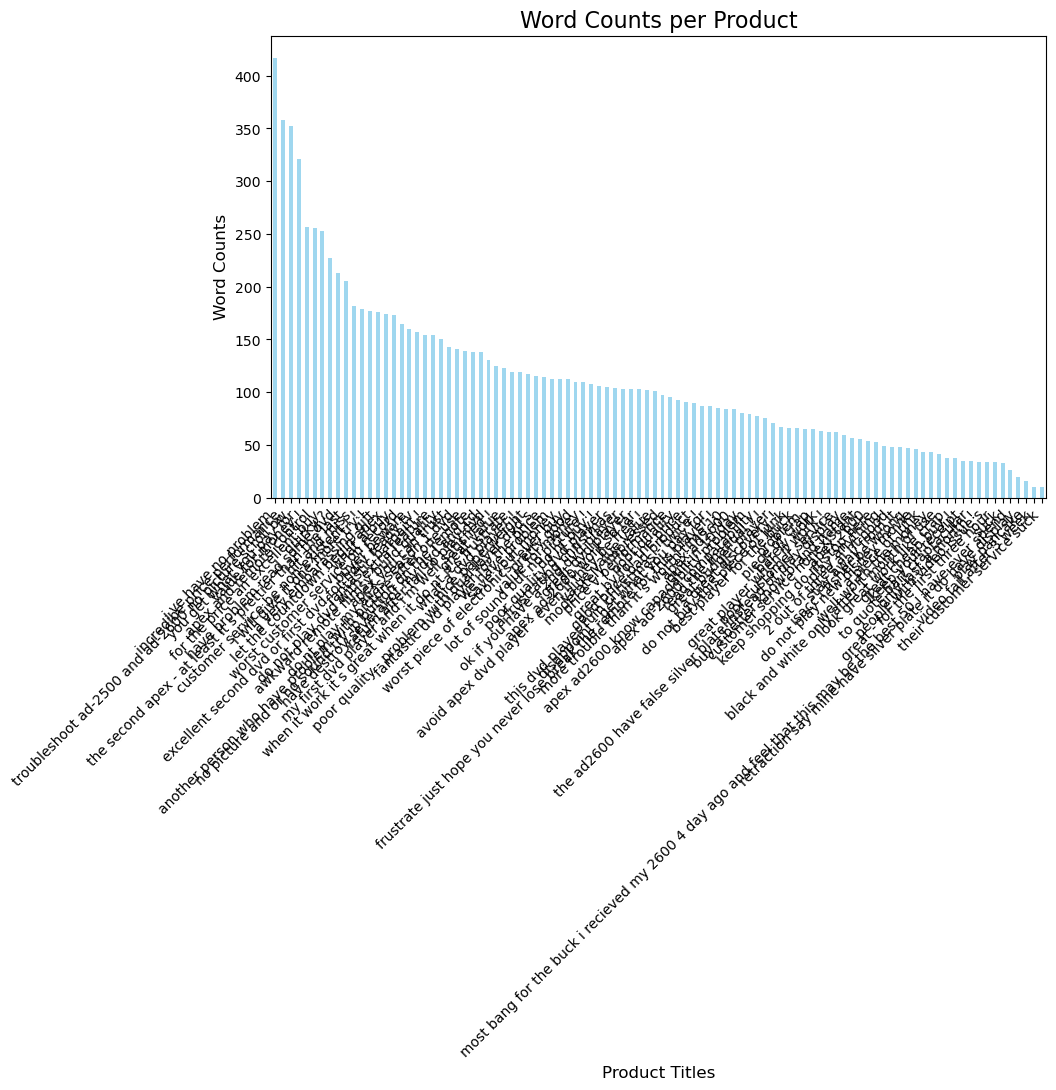

/var/folders/nt/6lv1078n1zb5x4lh7zpqbqm00000gn/T/ipykernel_53218/2202357273.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


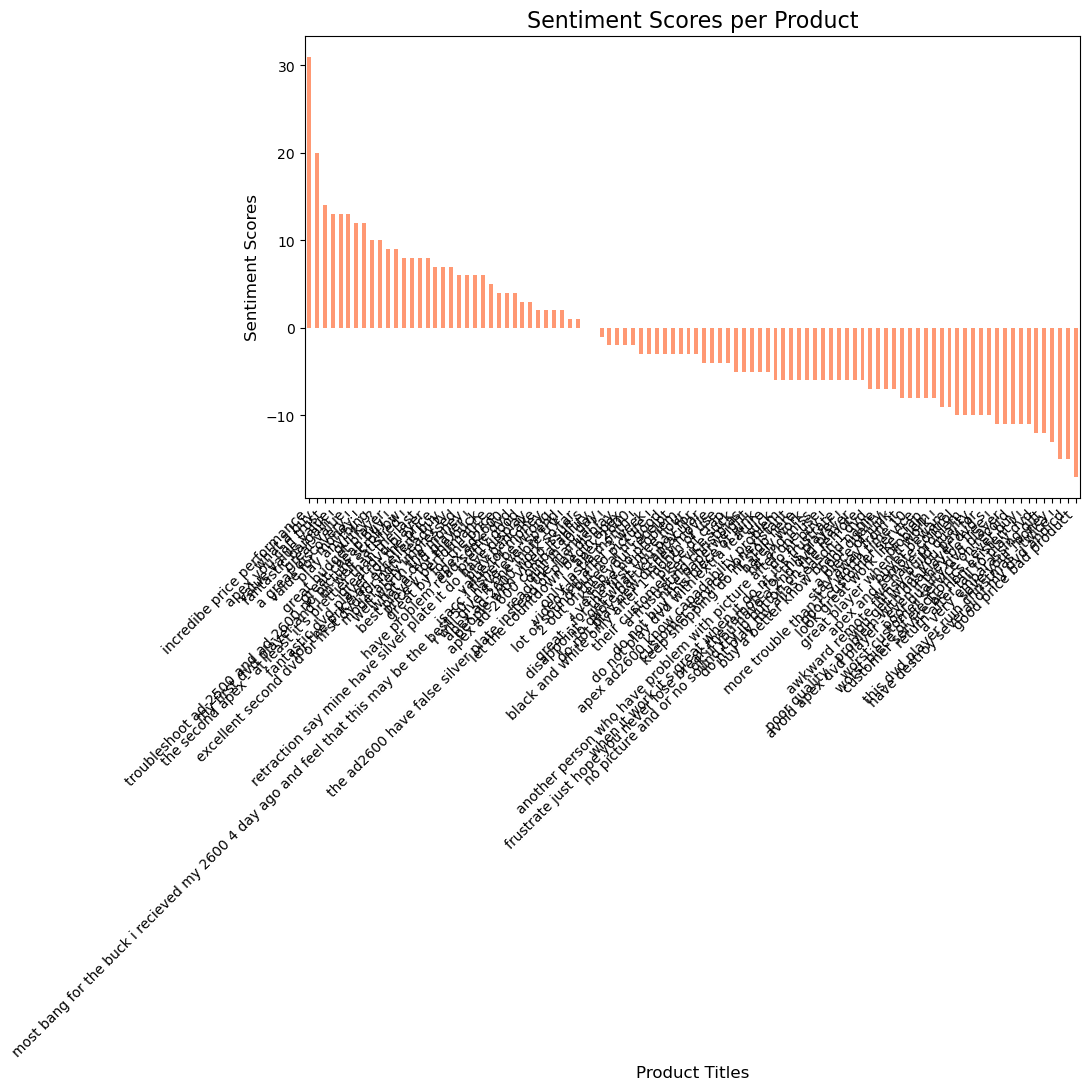

In [35]:
import matplotlib.pyplot as plt

# Step 1: Plot Word Counts per Product
plt.figure(figsize=(10, 6))
word_count_per_product.sort_values(ascending=False).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Word Counts per Product', fontsize=16)
plt.xlabel('Product Titles', fontsize=12)
plt.ylabel('Word Counts', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Step 2: Plot Sentiments per Product
plt.figure(figsize=(10, 6))
sentiment_per_product.sort_values(ascending=False).plot(kind='bar', color='coral', alpha=0.8)
plt.title('Sentiment Scores per Product', fontsize=16)
plt.xlabel('Product Titles', fontsize=12)
plt.ylabel('Sentiment Scores', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()



Readability Analysis Summary:

Averages across all texts:
Flesch Reading Ease: 83.85
Flesch-Kincaid Grade: 5.14
Gunning Fog Index: 7.32
SMOG Index: 0.00
Coleman-Liau Index: 3.34

Flesch Reading Ease Score Interpretation:
Very Easy (90-100): 39.3%
Easy (80-89): 19.9%
Fairly Easy (70-79): 19.1%
Standard (60-69): 10.5%
Fairly Difficult (50-59): 5.0%
Difficult (30-49): 5.7%
Very Difficult (0-29): 0.5%


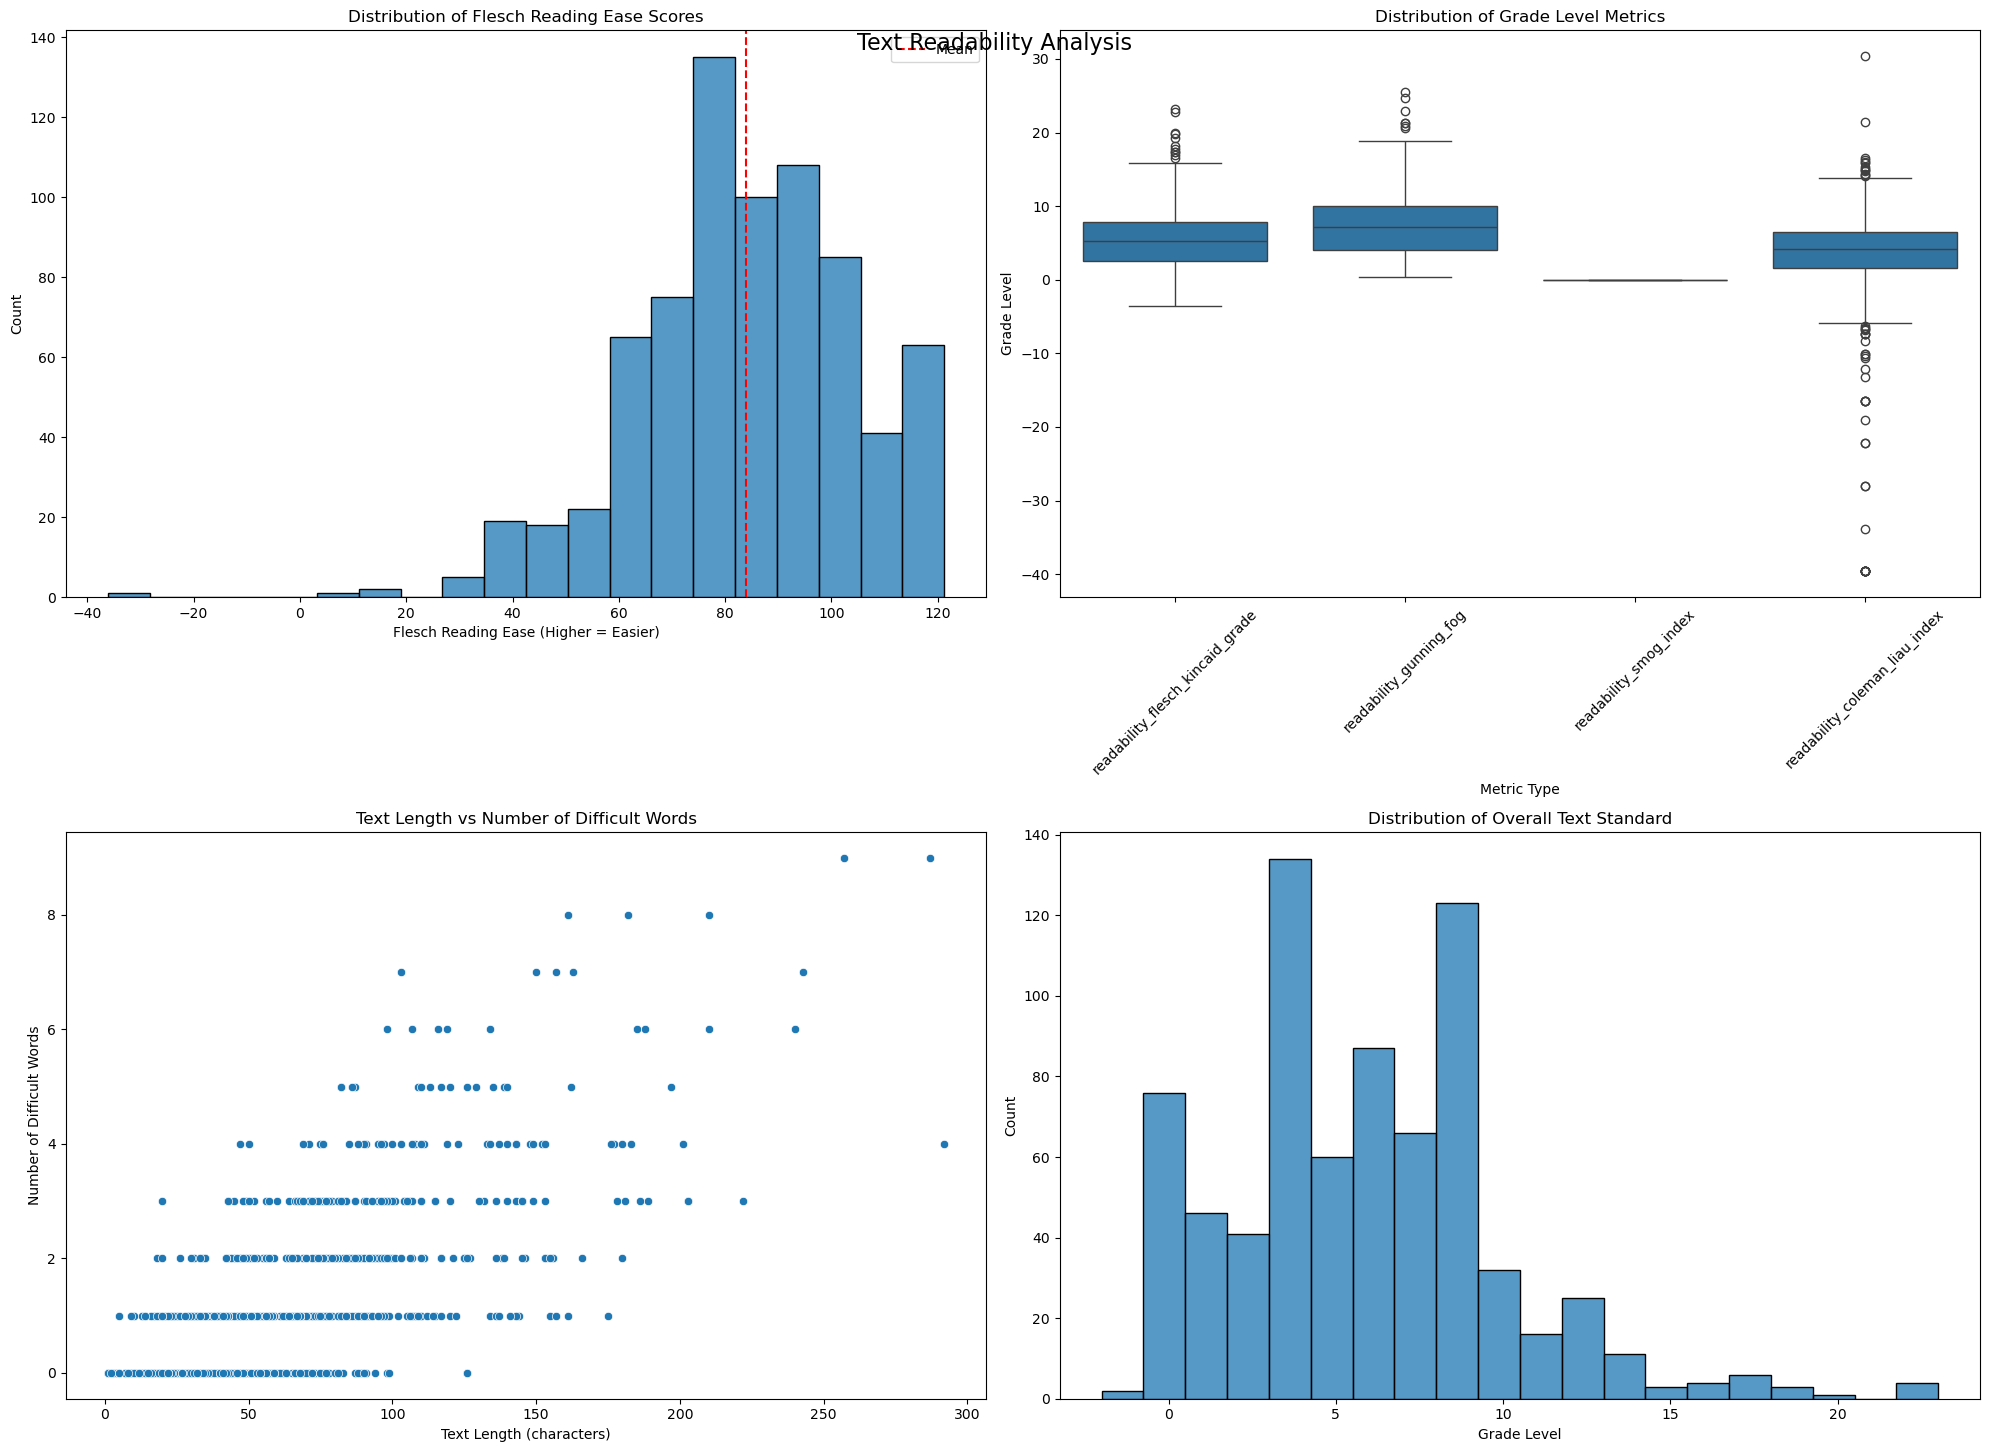

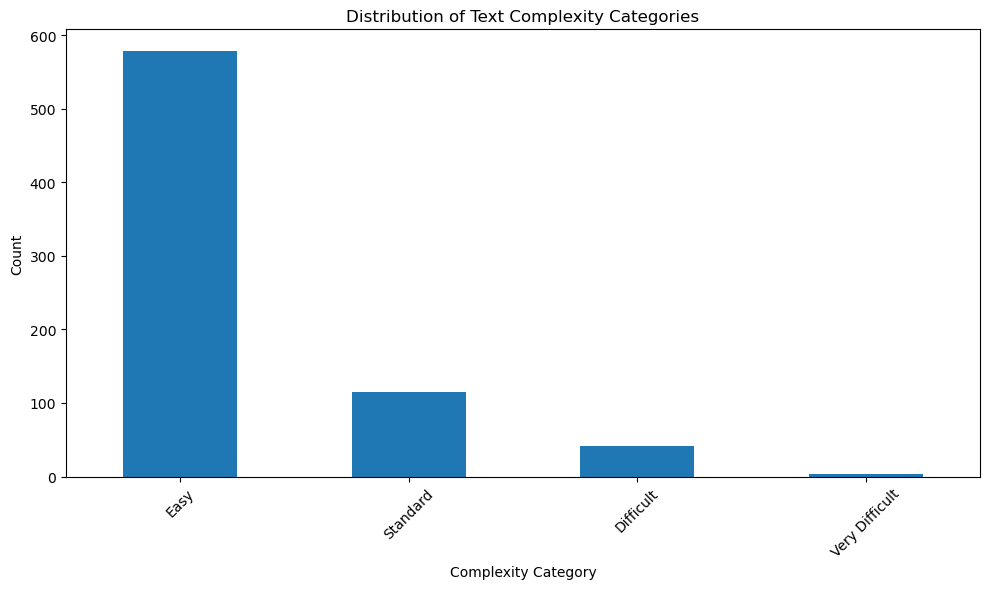

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import numpy as np
from collections import defaultdict

def analyze_text_readability(df):
    # Calculate various readability metrics for each sentence
    readability_scores = defaultdict(list)
    
    for text in df['sentence']:
        readability_scores['flesch_reading_ease'].append(textstat.flesch_reading_ease(text))
        readability_scores['flesch_kincaid_grade'].append(textstat.flesch_kincaid_grade(text))
        readability_scores['gunning_fog'].append(textstat.gunning_fog(text))
        readability_scores['smog_index'].append(textstat.smog_index(text))
        readability_scores['automated_readability_index'].append(textstat.automated_readability_index(text))
        readability_scores['coleman_liau_index'].append(textstat.coleman_liau_index(text))
        readability_scores['dale_chall_readability_score'].append(textstat.dale_chall_readability_score(text))
        readability_scores['difficult_words'].append(textstat.difficult_words(text))
        readability_scores['text_standard'].append(textstat.text_standard(text, float_output=True))
    
    # Add scores to dataframe
    for metric, scores in readability_scores.items():
        df[f'readability_{metric}'] = scores
    
    # Create visualizations
    fig = plt.figure(figsize=(20, 15))
    plt.suptitle('Text Readability Analysis', fontsize=16, y=0.95)
    
    # 1. Distribution of Flesch Reading Ease Scores
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='readability_flesch_reading_ease', bins=20)
    plt.title('Distribution of Flesch Reading Ease Scores')
    plt.xlabel('Flesch Reading Ease (Higher = Easier)')
    plt.axvline(x=df['readability_flesch_reading_ease'].mean(), 
                color='r', linestyle='--', label='Mean')
    plt.legend()
    
    # 2. Grade Level Comparisons
    plt.subplot(2, 2, 2)
    grade_metrics = ['readability_flesch_kincaid_grade', 
                    'readability_gunning_fog',
                    'readability_smog_index', 
                    'readability_coleman_liau_index']
    
    grade_data = df[grade_metrics].melt()
    sns.boxplot(data=grade_data, x='variable', y='value')
    plt.xticks(rotation=45)
    plt.title('Distribution of Grade Level Metrics')
    plt.xlabel('Metric Type')
    plt.ylabel('Grade Level')
    
    # 3. Difficult Words vs Text Length
    plt.subplot(2, 2, 3)
    df['text_length'] = df['sentence'].str.len()
    sns.scatterplot(data=df, x='text_length', y='readability_difficult_words')
    plt.title('Text Length vs Number of Difficult Words')
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Number of Difficult Words')
    
    # 4. Overall Text Standard Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='readability_text_standard', bins=20)
    plt.title('Distribution of Overall Text Standard')
    plt.xlabel('Grade Level')
    
    plt.tight_layout()
    
    # Print summary statistics
    print("\nReadability Analysis Summary:")
    print("\nAverages across all texts:")
    print(f"Flesch Reading Ease: {df['readability_flesch_reading_ease'].mean():.2f}")
    print(f"Flesch-Kincaid Grade: {df['readability_flesch_kincaid_grade'].mean():.2f}")
    print(f"Gunning Fog Index: {df['readability_gunning_fog'].mean():.2f}")
    print(f"SMOG Index: {df['readability_smog_index'].mean():.2f}")
    print(f"Coleman-Liau Index: {df['readability_coleman_liau_index'].mean():.2f}")
    
    # Interpret Flesch Reading Ease Scores
    print("\nFlesch Reading Ease Score Interpretation:")
    ease_scores = df['readability_flesch_reading_ease']
    print(f"Very Easy (90-100): {(ease_scores >= 90).mean():.1%}")
    print(f"Easy (80-89): {((ease_scores >= 80) & (ease_scores < 90)).mean():.1%}")
    print(f"Fairly Easy (70-79): {((ease_scores >= 70) & (ease_scores < 80)).mean():.1%}")
    print(f"Standard (60-69): {((ease_scores >= 60) & (ease_scores < 70)).mean():.1%}")
    print(f"Fairly Difficult (50-59): {((ease_scores >= 50) & (ease_scores < 60)).mean():.1%}")
    print(f"Difficult (30-49): {((ease_scores >= 30) & (ease_scores < 50)).mean():.1%}")
    print(f"Very Difficult (0-29): {(ease_scores < 30).mean():.1%}")
    
    # Create a readability complexity category
    df['readability_complexity'] = pd.cut(
        df['readability_flesch_reading_ease'],
        bins=[-float('inf'), 30, 50, 70, float('inf')],
        labels=['Very Difficult', 'Difficult', 'Standard', 'Easy']
    )
    
    # Additional visualization for complexity distribution
    plt.figure(figsize=(10, 6))
    df['readability_complexity'].value_counts().plot(kind='bar')
    plt.title('Distribution of Text Complexity Categories')
    plt.xlabel('Complexity Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return df

# Analyze the sample data
analyzed_apex = analyze_text_readability(apex)

In [42]:
canon = pd.read_csv('/Users/vatsalyadaita/Documents/Fall 2024/CSE 482/Project/CSE482_PROJ/processed_data/canon_g3_updated.csv').drop(columns=['Unnamed: 0'])
nikon = pd.read_csv('/Users/vatsalyadaita/Documents/Fall 2024/CSE 482/Project/CSE482_PROJ/processed_data/nikon_coolpix_4300_updated.csv').drop(columns=['Unnamed: 0'])
nokia = pd.read_csv('/Users/vatsalyadaita/Documents/Fall 2024/CSE 482/Project/CSE482_PROJ/processed_data/nokia_6610_updated.csv').drop(columns=['Unnamed: 0'])
nomad = pd.read_csv('/Users/vatsalyadaita/Documents/Fall 2024/CSE 482/Project/CSE482_PROJ/processed_data/nomad_jukebox_zen_xtra_updated.csv').drop(columns=['Unnamed: 0'])


Readability Analysis Summary:

Averages across all texts:
Flesch Reading Ease: 75.17
Flesch-Kincaid Grade: 7.04
Gunning Fog Index: 9.57
SMOG Index: 0.00
Coleman-Liau Index: 5.15

Flesch Reading Ease Score Interpretation:
Very Easy (90-100): 24.8%
Easy (80-89): 20.1%
Fairly Easy (70-79): 19.1%
Standard (60-69): 15.1%
Fairly Difficult (50-59): 8.9%
Difficult (30-49): 9.0%
Very Difficult (0-29): 3.0%


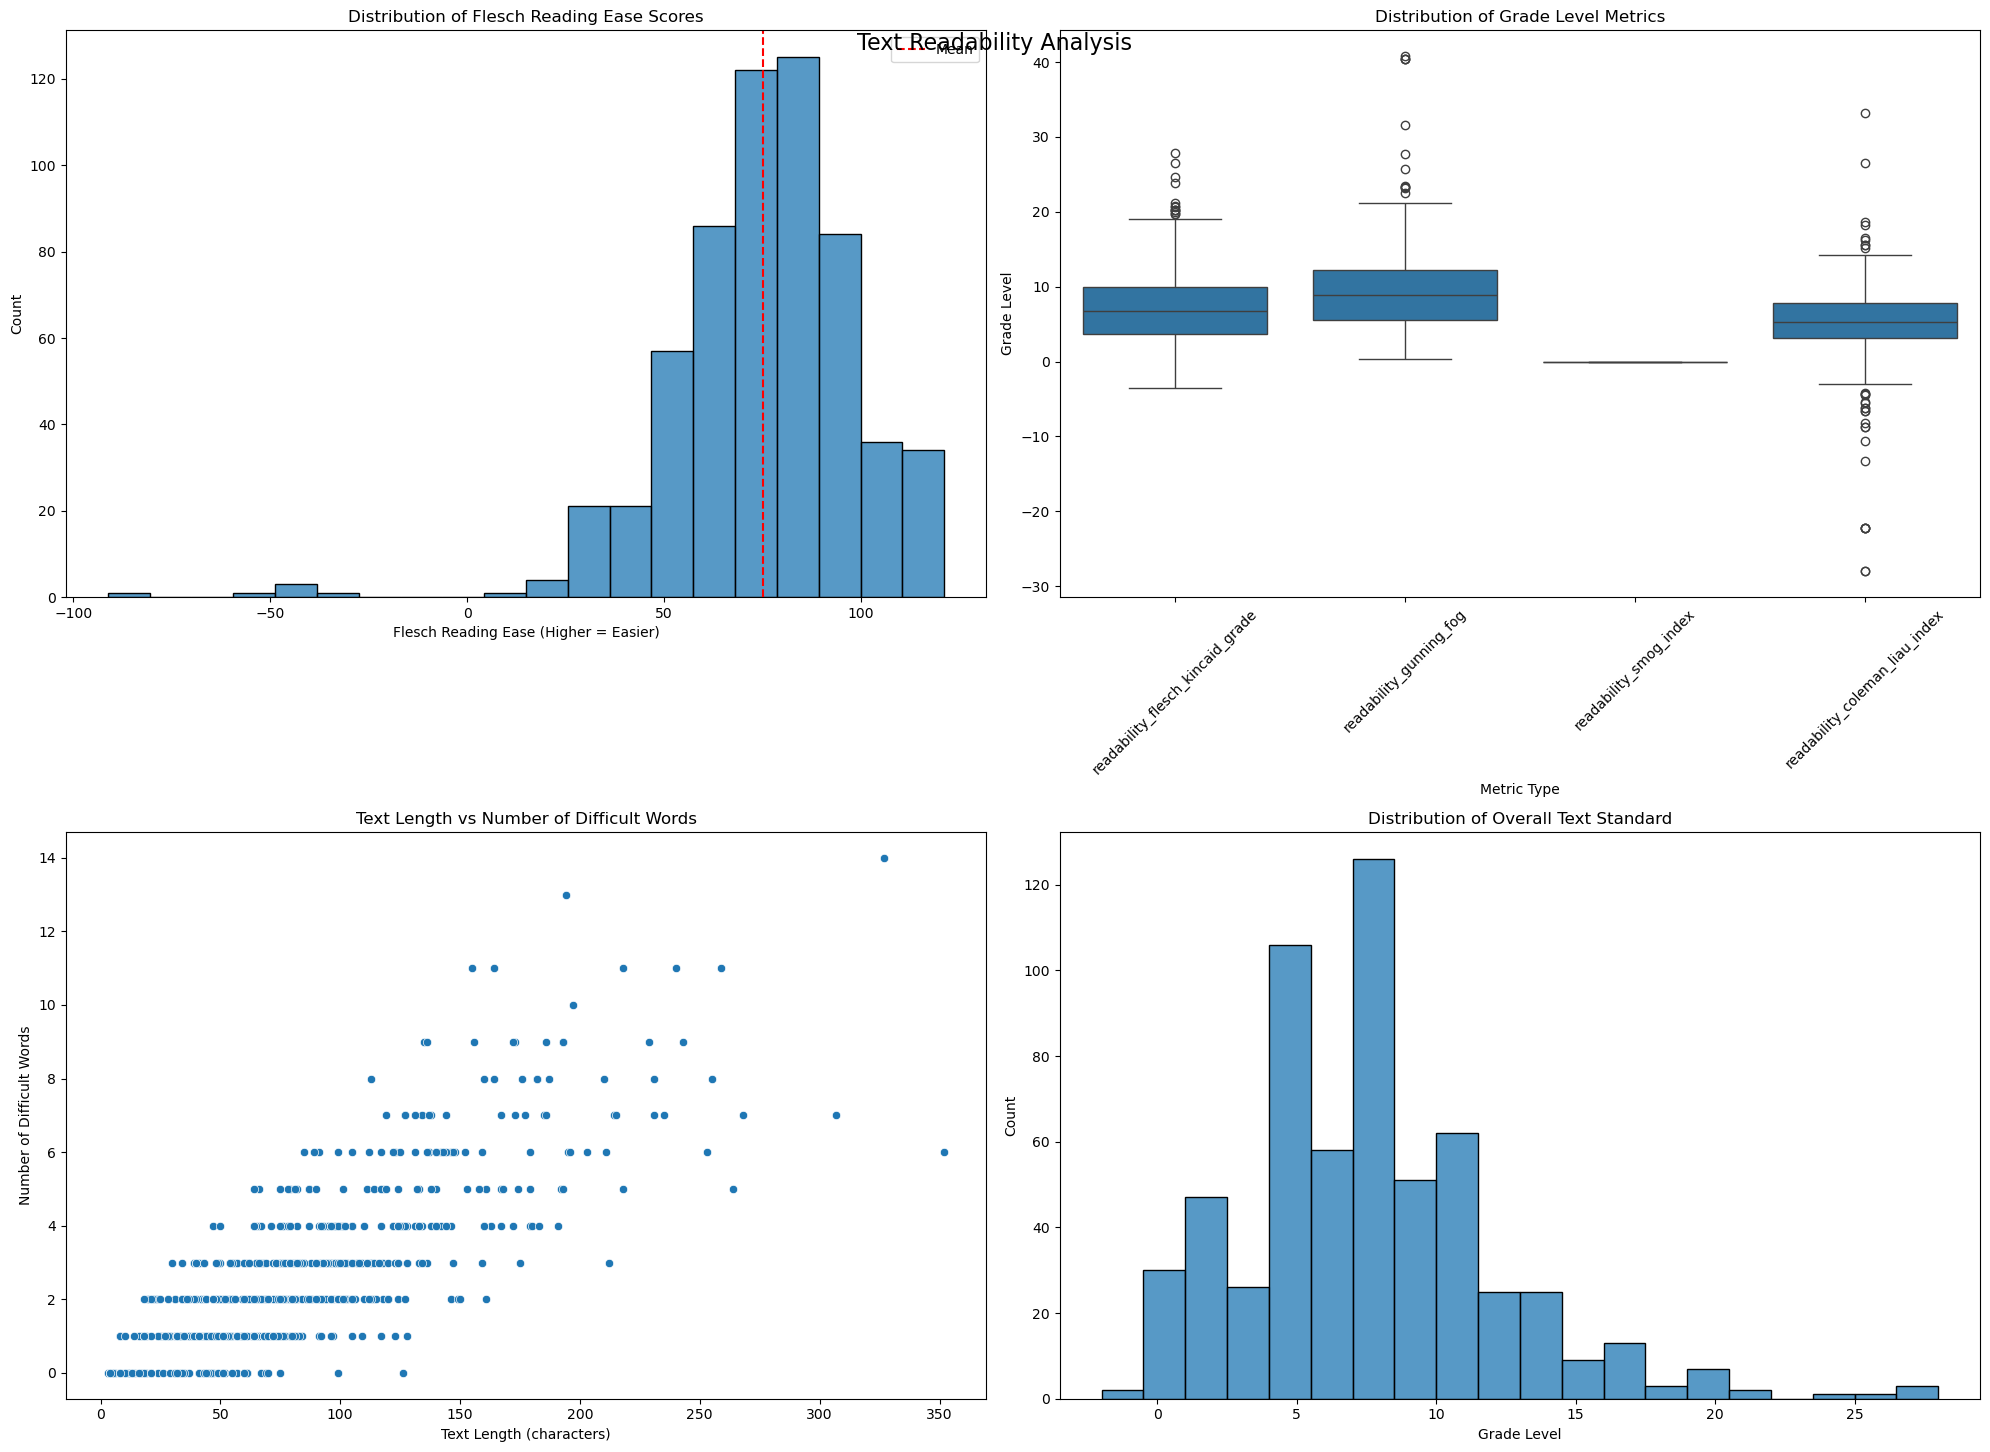

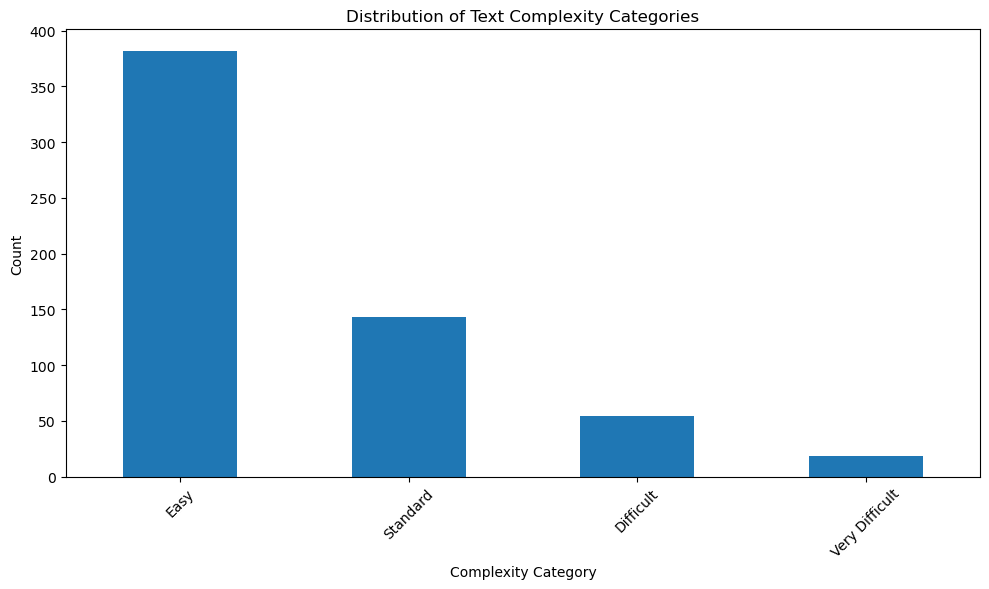

In [38]:
analyzed_canon = analyze_text_readability(canon)


Readability Analysis Summary:

Averages across all texts:
Flesch Reading Ease: 74.33
Flesch-Kincaid Grade: 7.04
Gunning Fog Index: 9.35
SMOG Index: 0.00
Coleman-Liau Index: 5.67

Flesch Reading Ease Score Interpretation:
Very Easy (90-100): 19.4%
Easy (80-89): 22.0%
Fairly Easy (70-79): 20.8%
Standard (60-69): 17.6%
Fairly Difficult (50-59): 11.3%
Difficult (30-49): 6.4%
Very Difficult (0-29): 2.6%


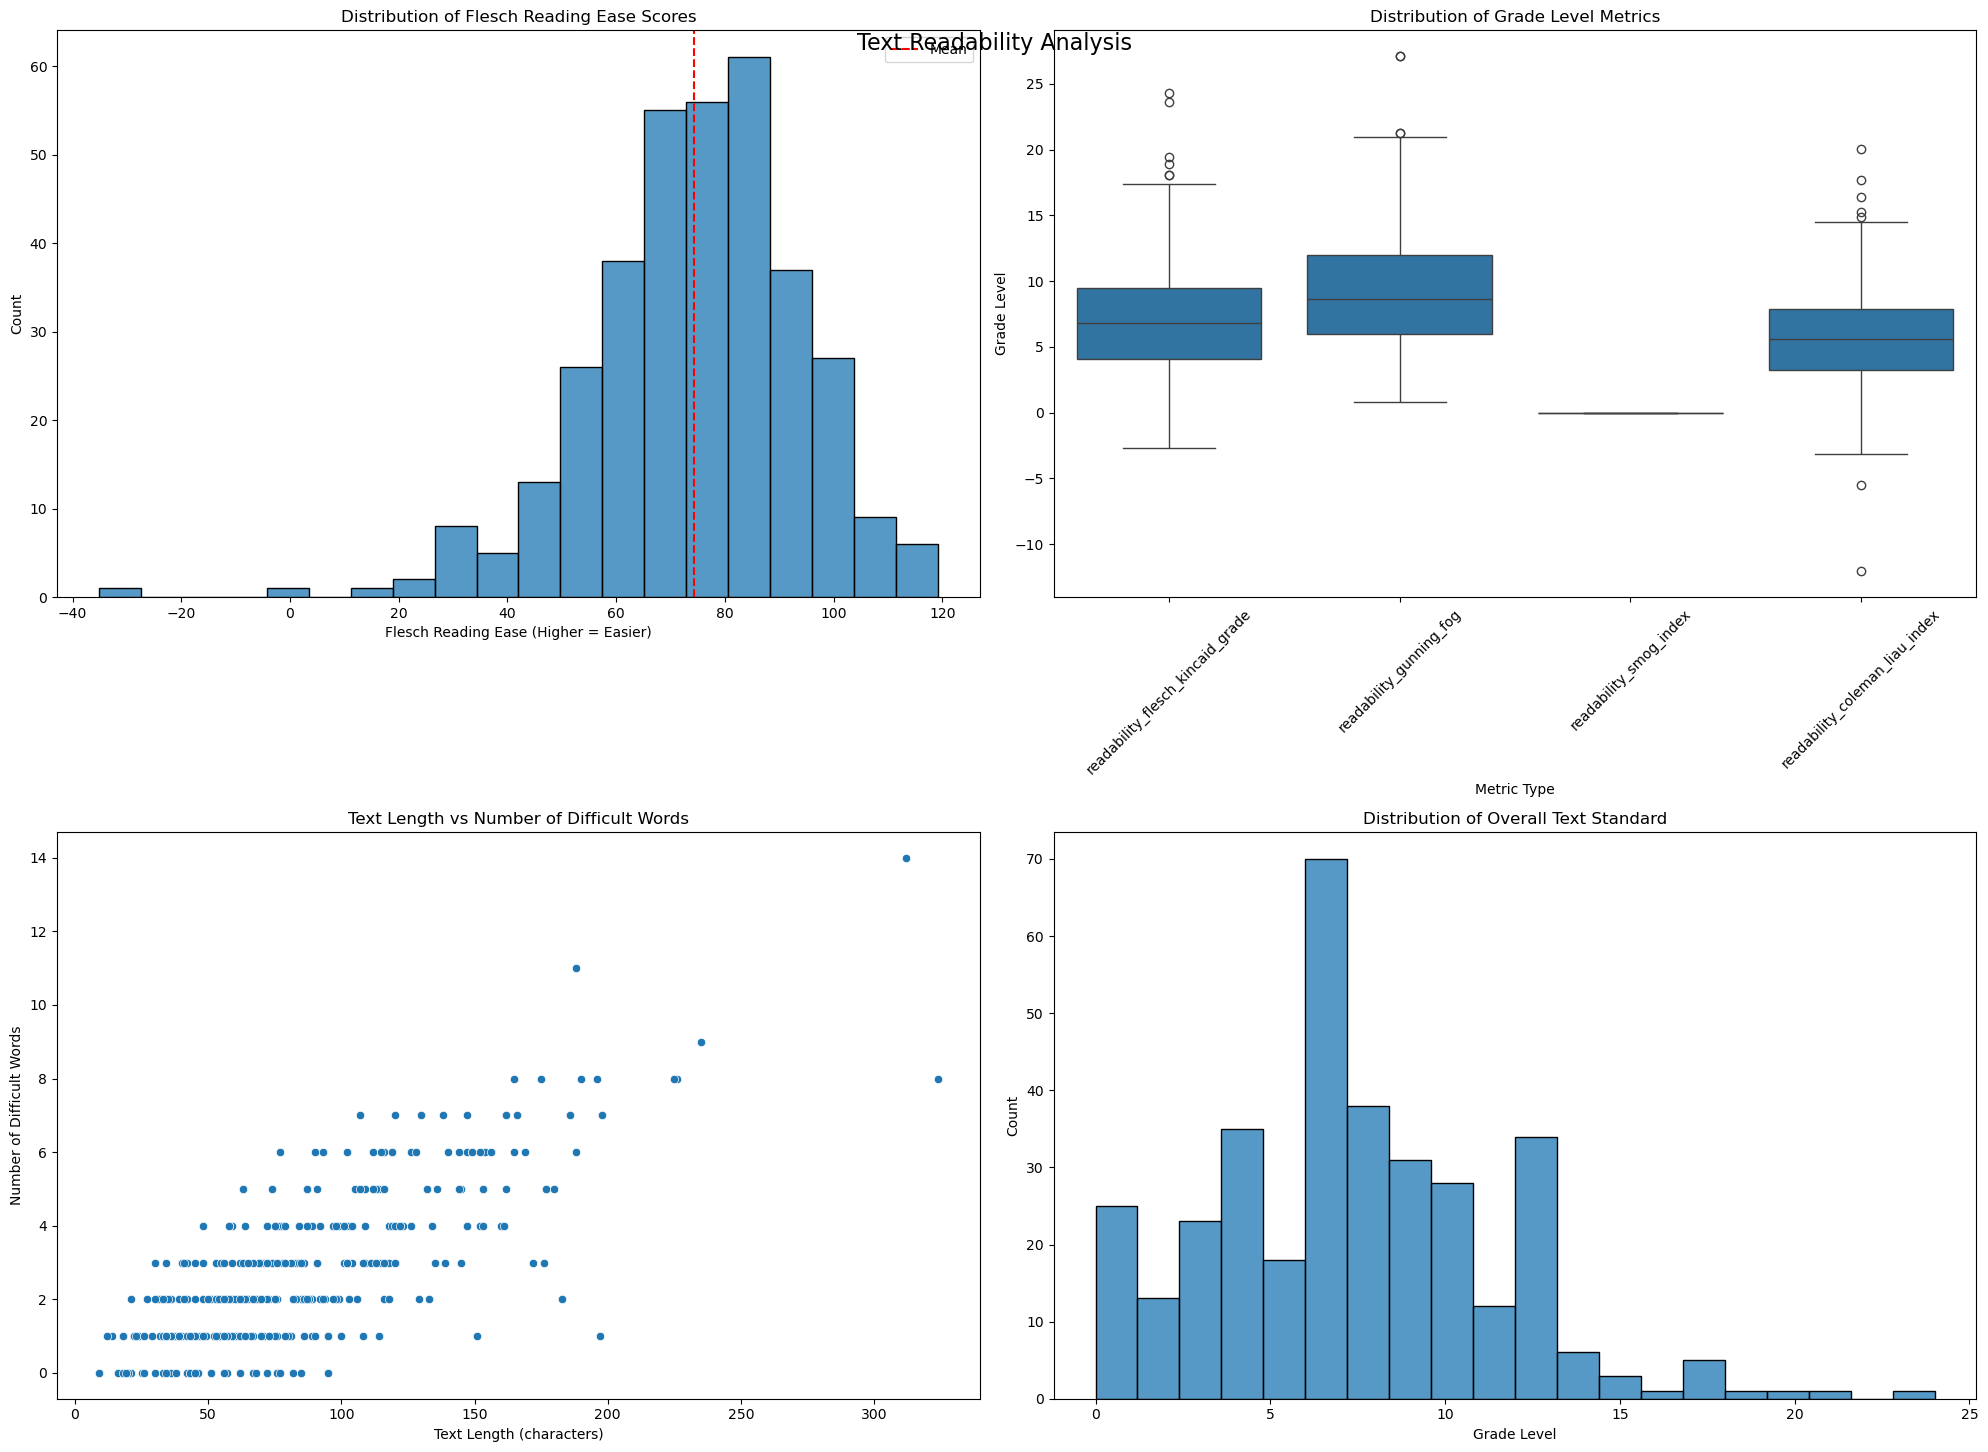

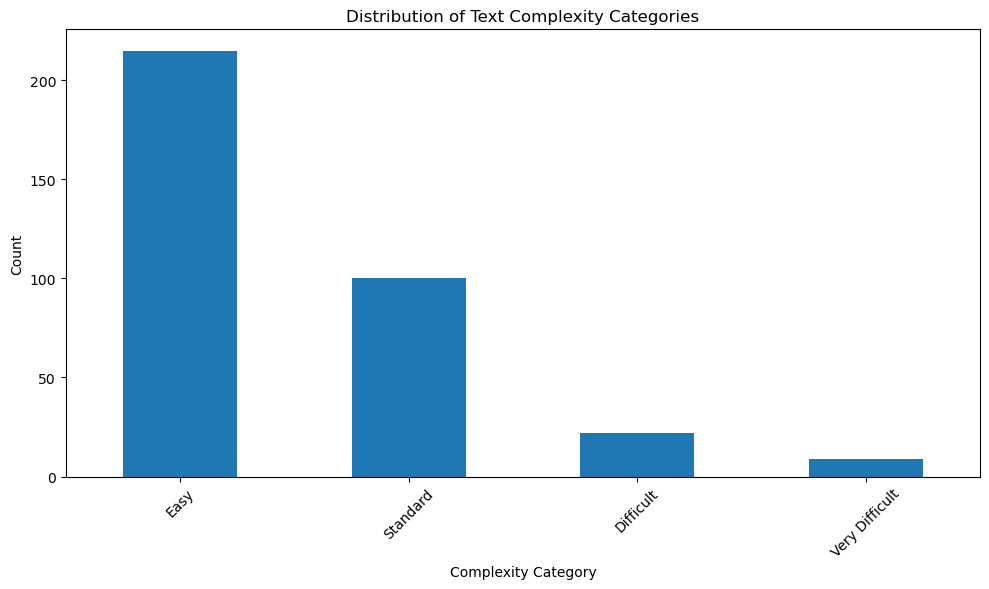

In [39]:
analyzed_nikon = analyze_text_readability(nikon)


Readability Analysis Summary:

Averages across all texts:
Flesch Reading Ease: 77.62
Flesch-Kincaid Grade: 6.46
Gunning Fog Index: 8.79
SMOG Index: 0.00
Coleman-Liau Index: 4.02

Flesch Reading Ease Score Interpretation:
Very Easy (90-100): 29.5%
Easy (80-89): 19.2%
Fairly Easy (70-79): 18.5%
Standard (60-69): 14.0%
Fairly Difficult (50-59): 9.6%
Difficult (30-49): 6.9%
Very Difficult (0-29): 2.3%


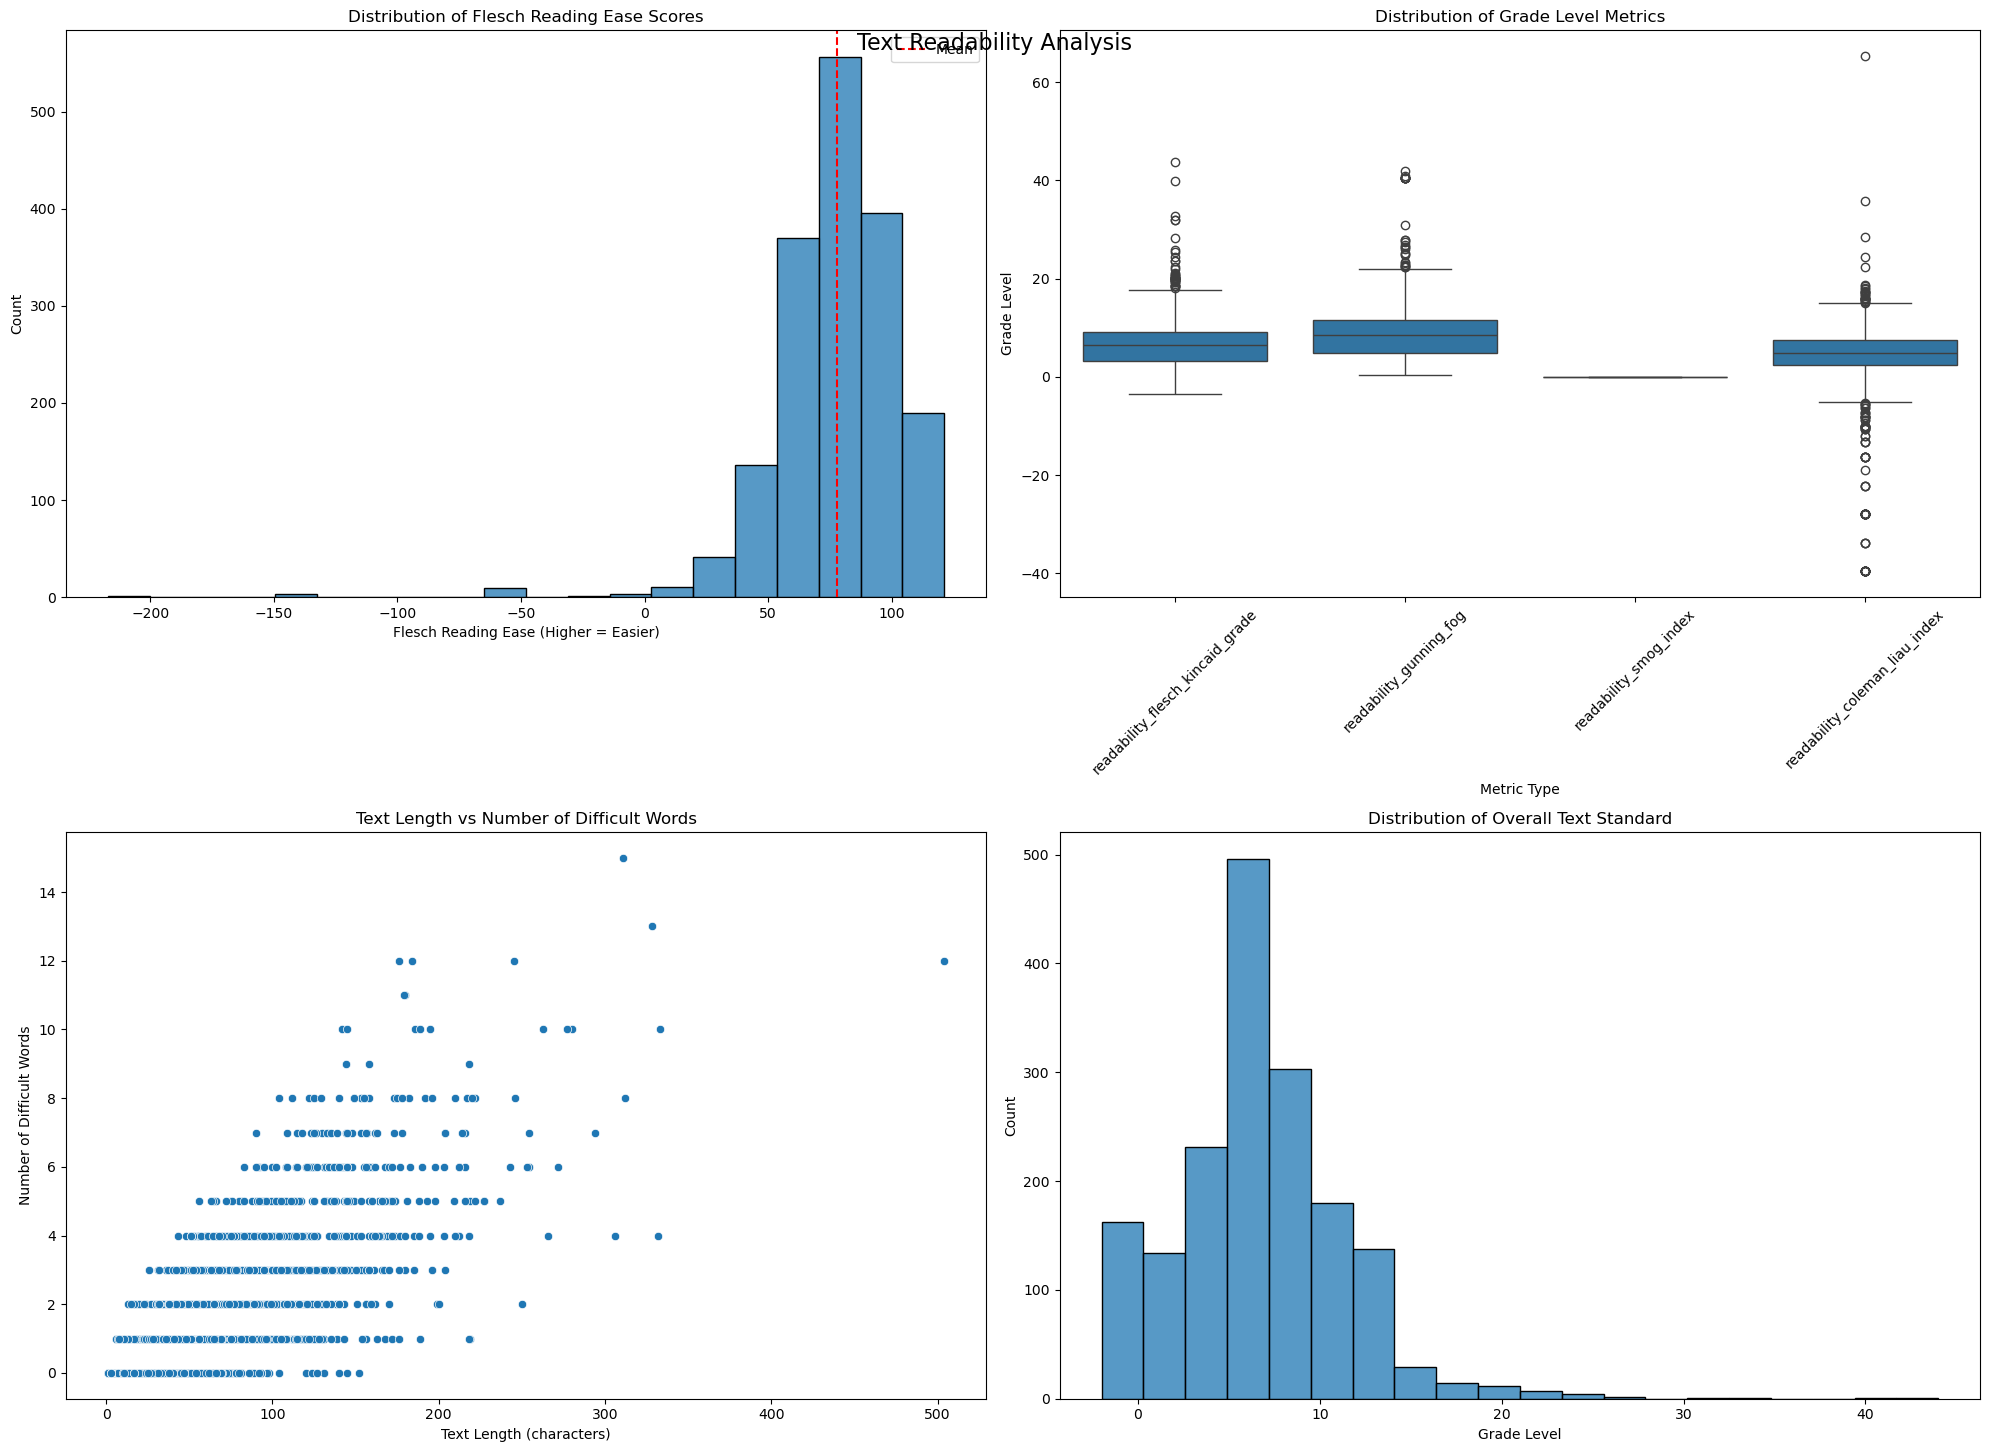

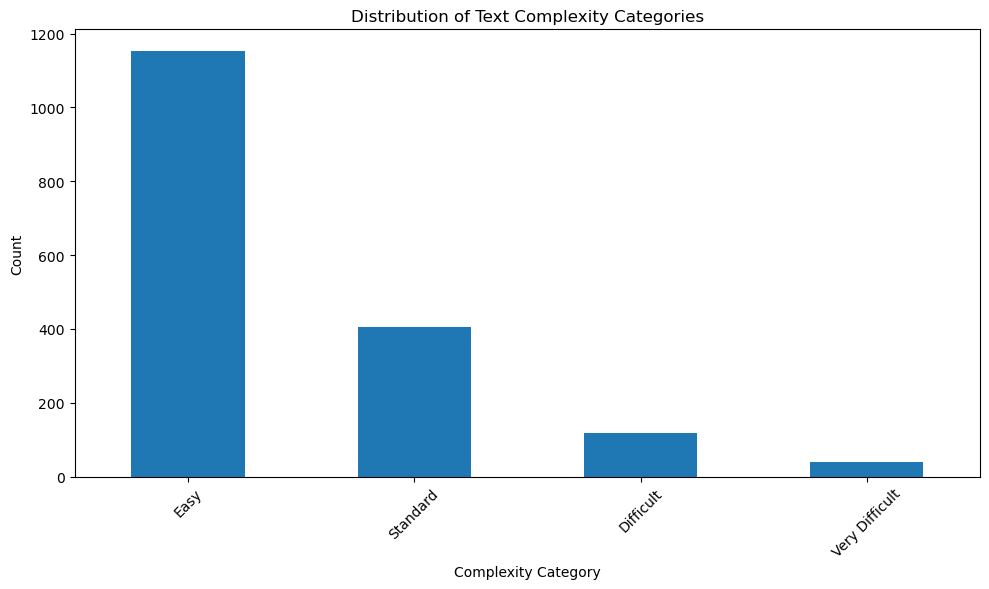

In [40]:
analyzed_nomad = analyze_text_readability(nomad)

In [43]:
nokia[nokia['sentence'].isna()]

,title,sentence,sentiment_dict,sentiment_total,[u],[p],[s],[cc],[cs],annotations,title_input_ids,title_attention_mask,sentence_input_ids,sentence_attention_mask
462,sound good but complicate,NaN,{},0,False,False,False,False,False,NaN,"[101, 2614, 2204, 2021, 4012, 24759, 24695, 10...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[101, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."



Readability Analysis Summary:

Averages across all texts:
Flesch Reading Ease: 79.36
Flesch-Kincaid Grade: 5.91
Gunning Fog Index: 8.31
SMOG Index: 0.00
Coleman-Liau Index: 4.79

Flesch Reading Ease Score Interpretation:
Very Easy (90-100): 31.1%
Easy (80-89): 20.6%
Fairly Easy (70-79): 18.6%
Standard (60-69): 13.4%
Fairly Difficult (50-59): 9.0%
Difficult (30-49): 5.3%
Very Difficult (0-29): 2.0%


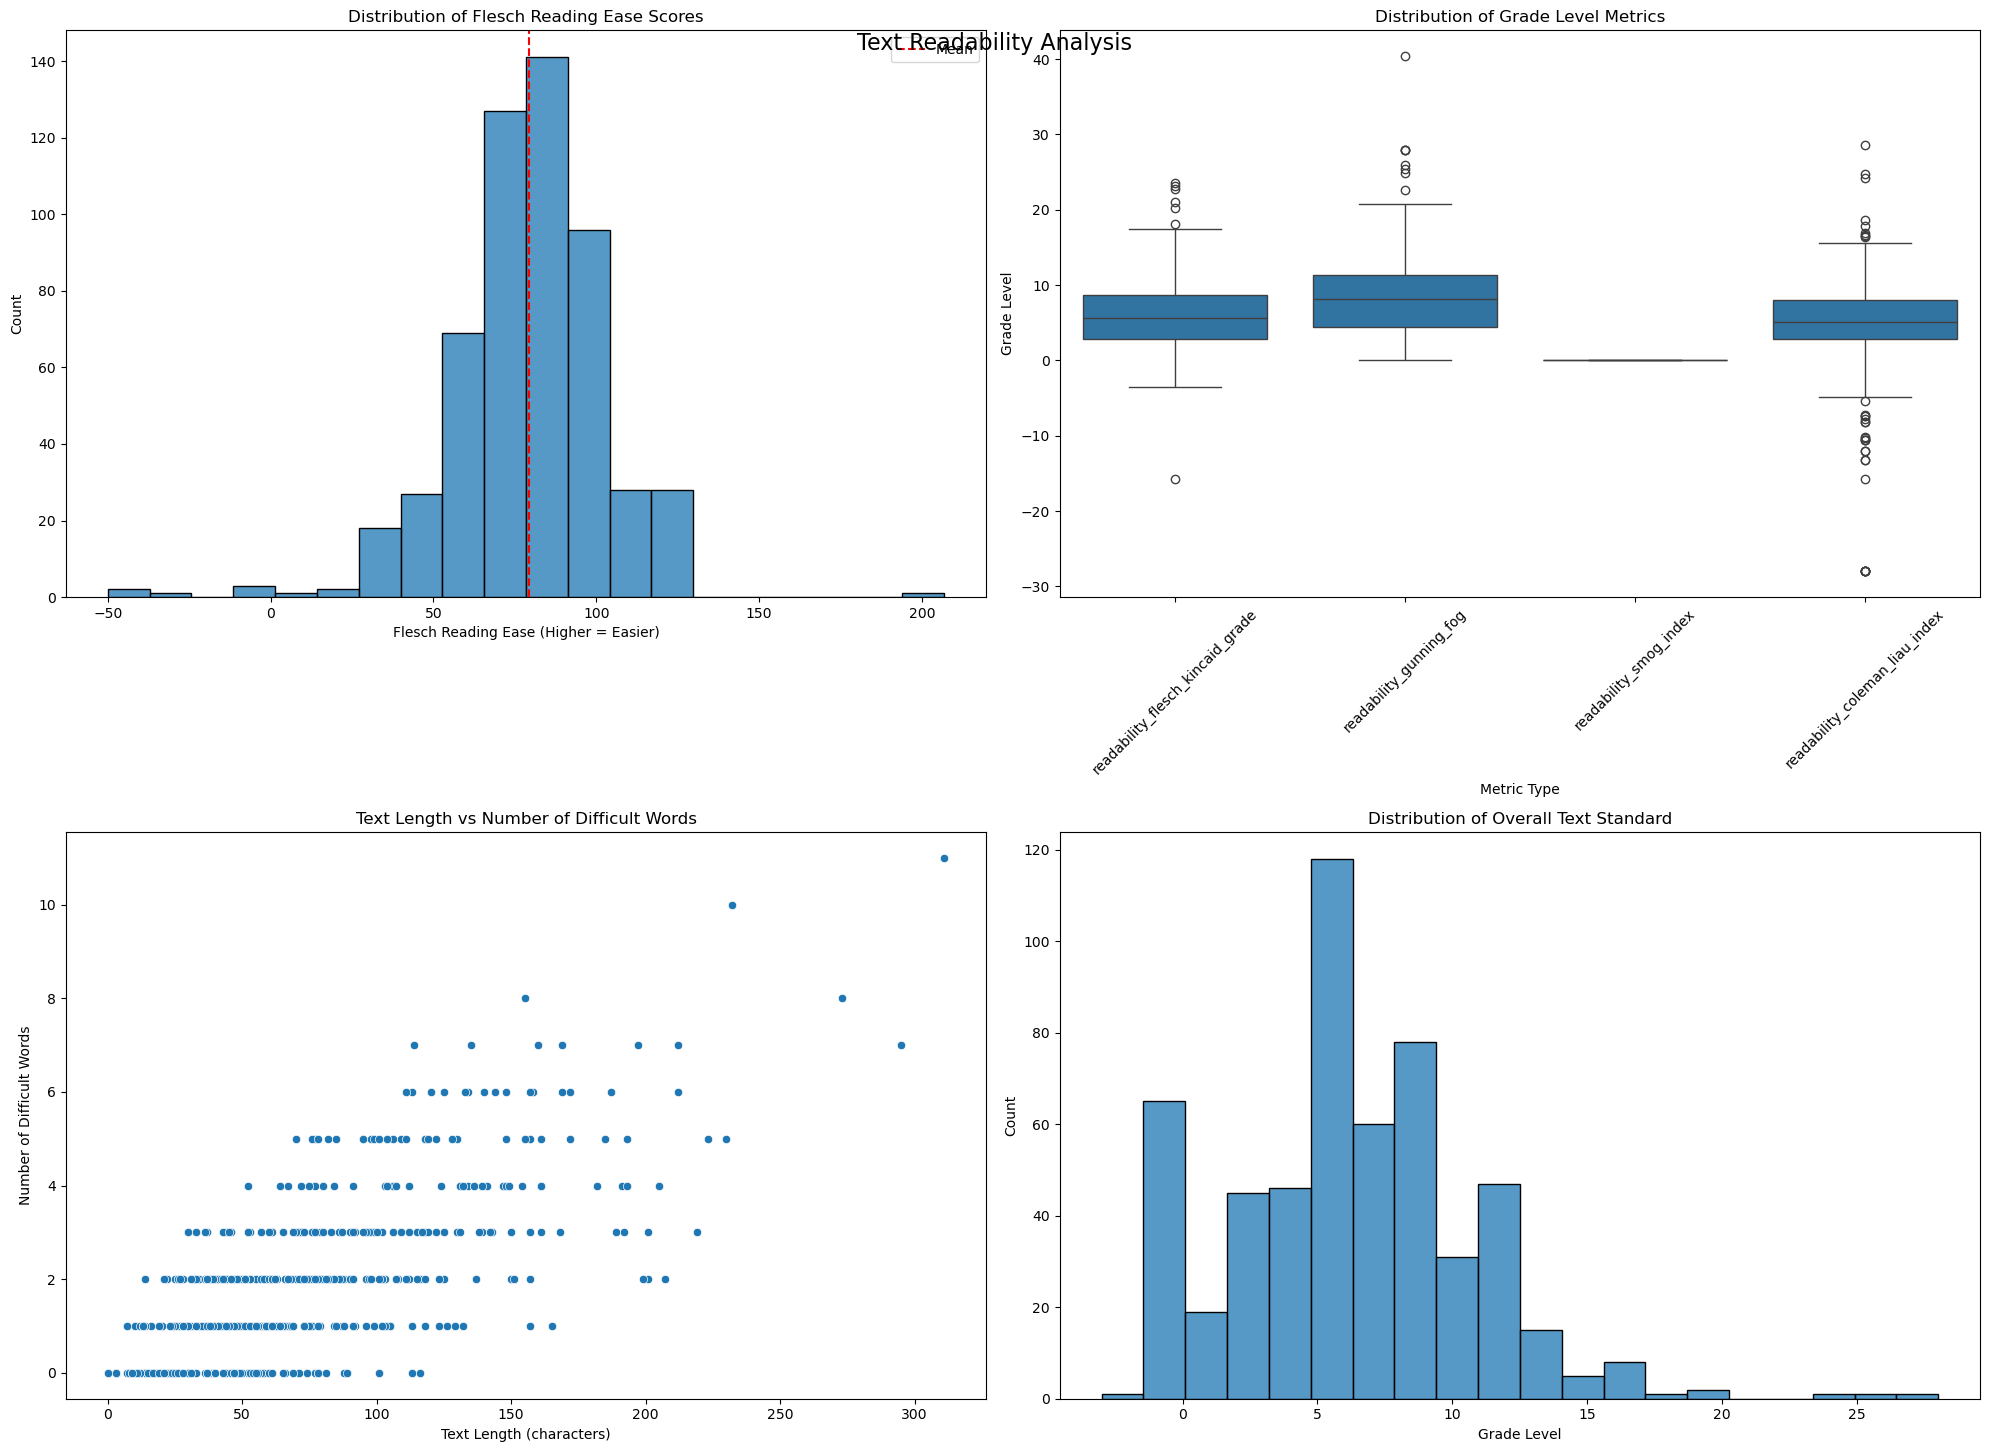

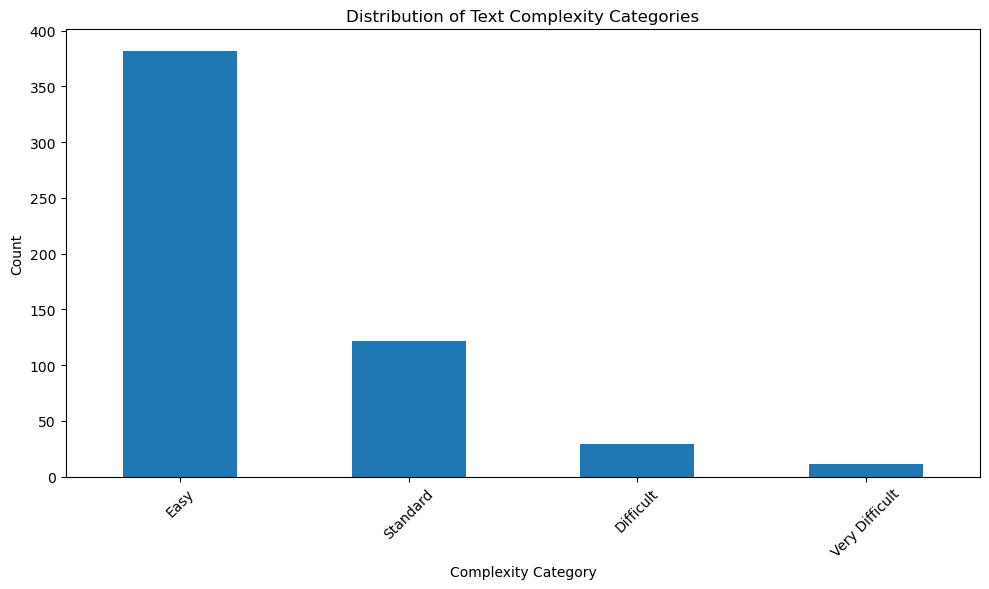

In [44]:
nokia['sentence'] = nokia['sentence'].fillna("").astype(str)
analyzed_nokia = analyze_text_readability(nokia)